In [127]:
#Important imports for running code
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [128]:
Calibrations =['Data_Air_to_Glass_Labday_3.txt','Data_Glass_to_Air_Labday_3.txt']

Air_to_Glass = np.loadtxt(Calibrations[0])
Glass_to_Air = np.loadtxt(Calibrations[1])

theta1_atg = Air_to_Glass[:, 0]
thetam_atg = Air_to_Glass[:, 1]

theta1_gta = Glass_to_Air[:, 0]
thetam_gta = Glass_to_Air[:, 1]

# Convert into radians
theta1_atg = theta1_atg * np.pi/180
theta1_gta = theta1_gta * np.pi/180
thetam_atg = thetam_atg * np.pi/180
thetam_gta = np.unwrap(thetam_gta,period=np.pi) * np.pi/180

theta1 = np.array([theta1_atg, theta1_gta])
thetam = np.array([thetam_atg, thetam_gta])

theta2_list = [theta1_atg - thetam_atg, theta1_gta + thetam_gta]

In [129]:
theta1_atg_err = np.full_like(np.sin(theta1[0]), abs(np.sin(0.5 * np.pi/180)))
theta2_atg_err = np.full_like(np.sin(theta2_list[0]), abs(np.sin(0.5 * np.pi/180)))
theta1_gta_err = np.full_like(np.sin(theta1[1]), abs(np.sin(0.5 * np.pi/180)))
theta2_gta_err = np.full_like(np.sin(theta2_list[1]), abs(np.sin(0.5 * np.pi/180)))

In [130]:
#Fit for the code
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

AIR TO GLASS LAB DAY 3

The index of refraction for the glass is 1.4542 plusminus 0.0134


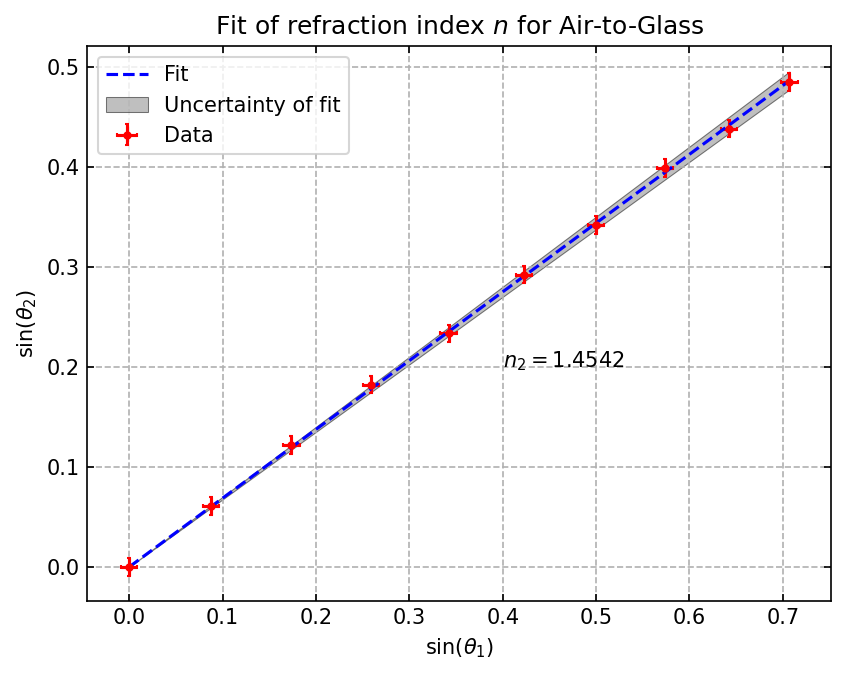

In [131]:
p_opt_atg, p_cov_atg = sp.curve_fit(n_fit, np.sin(theta1[0]), np.sin(theta2_list[0]), sigma = theta1_atg_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[0]), np.sin(theta2_list[0]), xerr = theta1_atg_err, yerr = theta2_atg_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0] - 2 * np.sqrt(p_cov_atg[0][0])), n_fit(np.sin(theta1[0]), p_opt_atg[0] + 2 * np.sqrt(p_cov_atg[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Air-to-Glass')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.4, 0.2, f'$n_2 = {round(p_opt_atg[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_atg[0], 4), round(np.sqrt(p_cov_atg[0][0]), 4)))
n_2_atg = p_opt_atg
plt.show()

GLASS TO AIR LAB DAY 3

The index of refraction for the glass is 0.9785 plusminus 0.0061


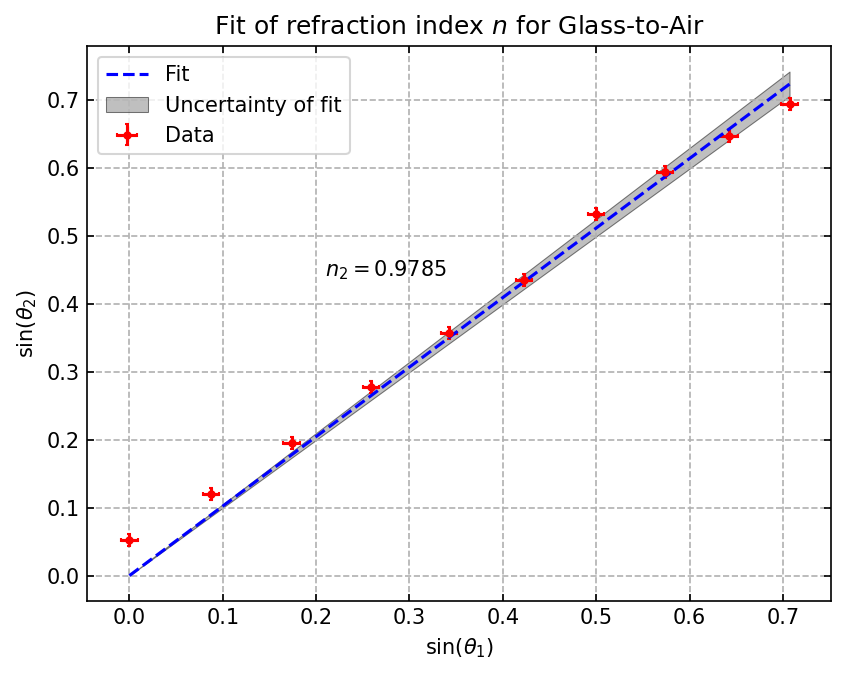

In [132]:
p_opt_gta, p_cov_gta = sp.curve_fit(n_fit, np.sin(theta1[1]), np.sin(theta2_list[1]), sigma = theta1_gta_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[1]), np.sin(theta2_list[1]), xerr = theta1_gta_err, yerr = theta2_gta_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0] - 4*np.sqrt(p_cov_gta[0][0])), n_fit(np.sin(theta1[1]), p_opt_gta[0] + 4* np.sqrt(p_cov_gta[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Glass-to-Air')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt_gta[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_gta[0], 4), round(np.sqrt(p_cov_gta[0][0]), 4)))
n_2_gta = p_opt_gta
plt.show()




COMPARING R+T01

In [133]:
#Get data
S_pol_L3 = np.loadtxt('S_pol_AtG_Labday_3.txt')
P_pol_L3 = np.loadtxt('P_pol_AtG_Labday_3.txt')

#Intensity of laser
E_0_S = 5 #1.8 on the day
E_0_P = 1.25

#Intensity of transmitted and reflected light
E_1_S = S_pol_L3[:, 5]
E_2_S = S_pol_L3[:, 2]

E_1_P = P_pol_L3[:, 5]
E_2_P = P_pol_L3[:, 2]

In [134]:
#Getting the small r value
r_s = E_1_S/E_0_S

r_p =E_1_P/E_0_P
r_p, r_s

(array([0.    , 0.    , 0.008 , 0.0096, 0.0064, 0.004 , 0.004 , 0.0008,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.008 , 0.036 ,
        0.088 , 0.184 ]),
 array([0.   , 0.   , 0.024, 0.038, 0.031, 0.03 , 0.046, 0.034, 0.054,
        0.056, 0.094, 0.11 , 0.154, 0.22 , 0.26 , 0.4  , 0.58 , 0.72 ]))

In [135]:
#Getting the small t value
t_s = E_2_S/E_0_S

t_p = E_2_P/E_0_P
t_p, t_s

(array([0.344, 0.36 , 0.384, 0.368, 0.352, 0.32 , 0.32 , 0.312, 0.288,
        0.272, 0.24 , 0.232, 0.184, 0.152, 0.112, 0.08 , 0.036, 0.   ]),
 array([0.76 , 0.82 , 0.84 , 0.8  , 0.76 , 0.72 , 0.66 , 0.66 , 0.62 ,
        0.58 , 0.48 , 0.48 , 0.36 , 0.28 , 0.214, 0.144, 0.061, 0.008]))

In [136]:
#Large R value:
R_s = r_s**2

R_p= r_p**2
R_p, R_s

(array([0.0000e+00, 0.0000e+00, 6.4000e-05, 9.2160e-05, 4.0960e-05,
        1.6000e-05, 1.6000e-05, 6.4000e-07, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.4000e-05,
        1.2960e-03, 7.7440e-03, 3.3856e-02]),
 array([0.      , 0.      , 0.000576, 0.001444, 0.000961, 0.0009  ,
        0.002116, 0.001156, 0.002916, 0.003136, 0.008836, 0.0121  ,
        0.023716, 0.0484  , 0.0676  , 0.16    , 0.3364  , 0.5184  ]))

In [137]:
#Import the angles measured:
theta1_s = S_pol_L3[:, 0]
thetam_reflect_s = 360 - S_pol_L3[:, 4]
thetam_trans_s = S_pol_L3[:, 1]

theta1_p = P_pol_L3[:, 0]
thetam_reflect_p = 360 - P_pol_L3[:, 4]
thetam_trans_p = P_pol_L3[:, 1]

#convert to radians:
theta1_s = theta1_s * np.pi/180
#thetam_reflect_s = thetam_reflect_s * np.pi/180
thetam_trans_s = thetam_trans_s * np.pi/180
thetam_reflect_s = np.unwrap(thetam_reflect_s,period=np.pi) * np.pi/180
#thetam_trans_s = np.unwrap(thetam_trans_s, period=np.pi) *np.pi/180

theta1_p = theta1_p * np.pi/180
#thetam_reflect_p = thetam_reflect_p * np.pi/180
thetam_trans_p = thetam_trans_p *np.pi/180
thetam_reflect_p = np.unwrap(thetam_reflect_p,period=np.pi) * np.pi/180
#thetam_trans_p = np.unwrap(thetam_trans_p, period=np.pi) *np.pi/180

# Calculate real angle
theta2_reflect_s = theta1_s - thetam_reflect_s
theta2_trans_s = theta1_s - thetam_trans_s

theta2_reflect_p = theta1_p - thetam_reflect_p
theta2_trans_p = theta1_p - thetam_trans_p

# Uncertainties
Volt_err = S_pol_L3[:, 3] + 0.1

In [138]:
#Large T value:

T_s = (np.cos(theta2_trans_s)) / (np.cos(theta1_s)) * n_2_atg/n_2_gta * t_s**2

T_p = (np.cos(theta2_trans_p)) / (np.cos(theta1_p)) * n_2_atg/n_2_gta * t_p**2

T_s


array([8.58442987e-01, 1.00128324e+00, 1.05691995e+00, 9.68247961e-01,
       8.86400024e-01, 8.12961295e-01, 7.02469266e-01, 7.27501188e-01,
       6.73134629e-01, 6.18407170e-01, 4.56630426e-01, 4.97831113e-01,
       3.13621121e-01, 2.18735227e-01, 1.54654560e-01, 9.12151533e-02,
       2.43965086e-02, 8.60003824e-04])

In [139]:
#Check if R+T holds:
total_s = R_s + T_s

total_p = R_p + T_p
total_p, total_s

(array([0.1758738 , 0.19298975, 0.2209387 , 0.20497343, 0.19018727,
        0.16060095, 0.16515111, 0.16257611, 0.14524578, 0.13600546,
        0.11415761, 0.11629888, 0.08192868, 0.06445993, 0.04242549,
        0.02944883, 0.01624114, 0.033856  ]),
 array([0.85844299, 1.00128324, 1.05749595, 0.96969196, 0.88736102,
        0.81386129, 0.70458527, 0.72865719, 0.67605063, 0.62154317,
        0.46546643, 0.50993111, 0.33733712, 0.26713523, 0.22225456,
        0.25121515, 0.36079651, 0.51926   ]))

In [140]:
#Difference from 1
D_s = 1 - R_s - T_s
D_s


array([ 0.14155701, -0.00128324, -0.05749595,  0.03030804,  0.11263898,
        0.18613871,  0.29541473,  0.27134281,  0.32394937,  0.37845683,
        0.53453357,  0.49006889,  0.66266288,  0.73286477,  0.77774544,
        0.74878485,  0.63920349,  0.48074   ])

In [141]:
#Brewster angle
Brewster = np.arctan(n_2_atg/n_2_gta)
#Critical angle for internal reflection
Critical = np.arcsin(1/n_2_atg)

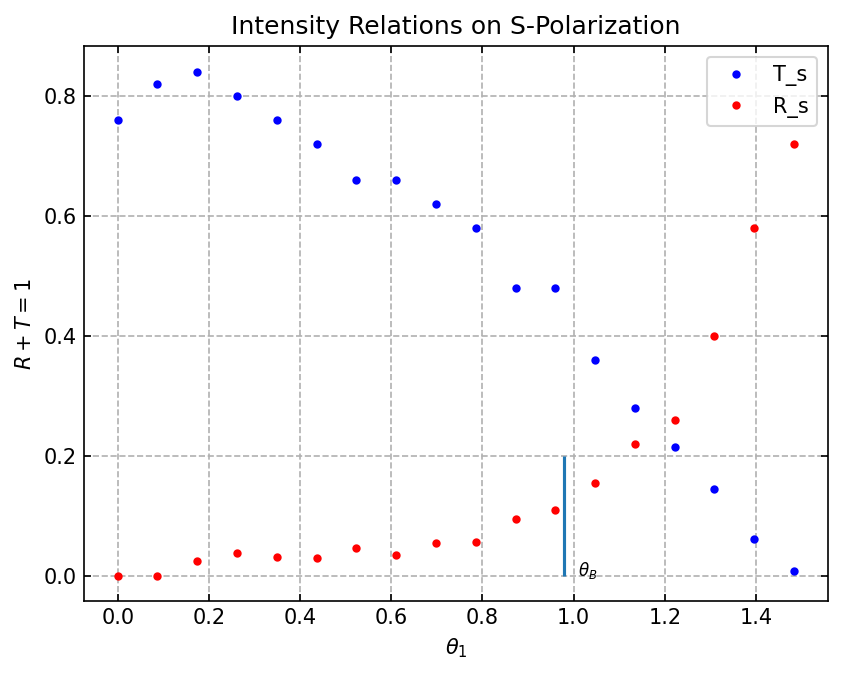

In [142]:
fig, ax = plt.subplots()

ax.plot(theta1_s, t_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, r_s, '.', color= 'red',label = 'R_s')  # Plotting Reflected Light
# ax.plot(theta1_s, total_s, '.', markersize = 4, color = 'black', label = 'total') #Plotting total light measured
ax.vlines(x = Brewster, ymin=0, ymax=0.20)
# ax.vlines(x = Critical, ymin=0, ymax=20)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on S-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()

Text(1.01, 0.0, '$\\theta_{B}$')

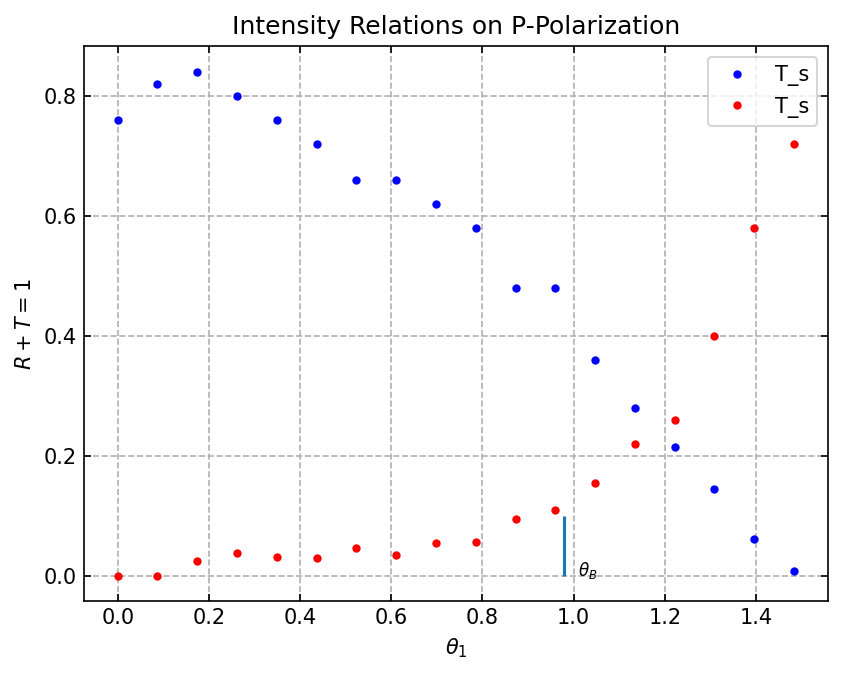

In [143]:
fig, ax = plt.subplots()

ax.plot(theta1_s, t_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, r_s, '.', color= 'red',label = 'T_s')  # Plotting Reflected Light
# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
ax.vlines(x = Brewster, ymin=0, ymax=0.1)
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on P-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)

INTENSITY PLOTS AIR TO GLASS

In [144]:
# Defining all the functions for the intensity
def reflected_p(angle1, angle2):
    return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def reflected_s(angle1, angle2):
    return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

C:\Users\hanse\AppData\Local\Temp\ipykernel_16984\3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2
C:\Users\hanse\AppData\Local\Temp\ipykernel_16984\3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


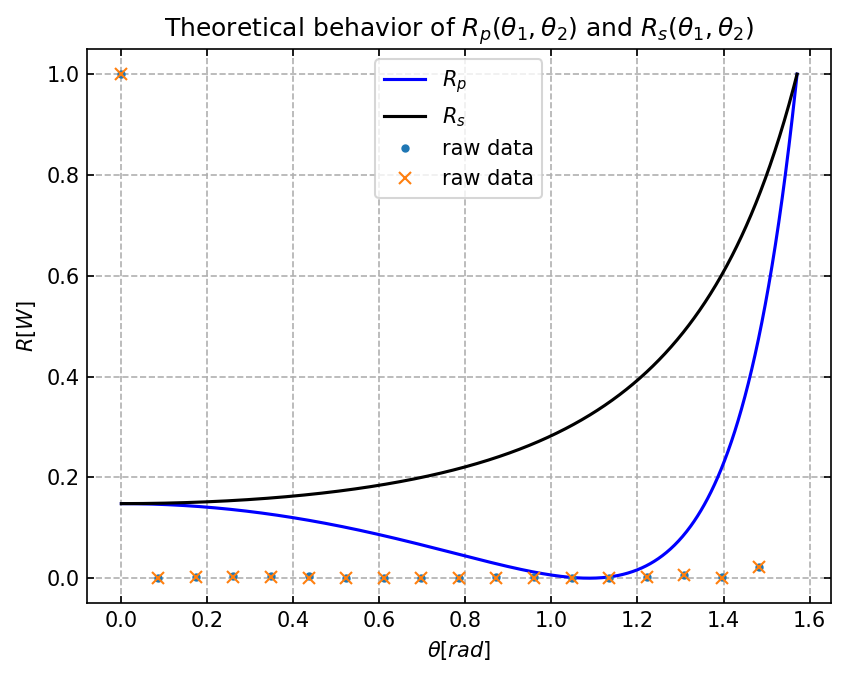

In [145]:
# Creating theoractical values for the angles
theoretical_theta1 = np.linspace(0, 90, 1000) * np.pi/180
theoretical_thetam = np.linspace(0, 50, 1000) * np.pi/180
theoretical_theta2 = theoretical_theta1 - theoretical_thetam

# Plotting reflection
plt.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), '-', color = 'blue', label = r'$R_p$')
plt.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '-', color = 'black', label = r'$R_s$')
plt.plot(theta1_s, reflected_s(theta1_s, theta2_reflect_s), '.', label = 'raw data')
plt.plot(theta1_p, reflected_p(theta1_p, theta2_reflect_p), 'x', label = 'raw data')


# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $R_p(\theta_1, \theta_2)$ and $R_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$R [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

C:\Users\hanse\AppData\Local\Temp\ipykernel_16984\3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
C:\Users\hanse\AppData\Local\Temp\ipykernel_16984\3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2


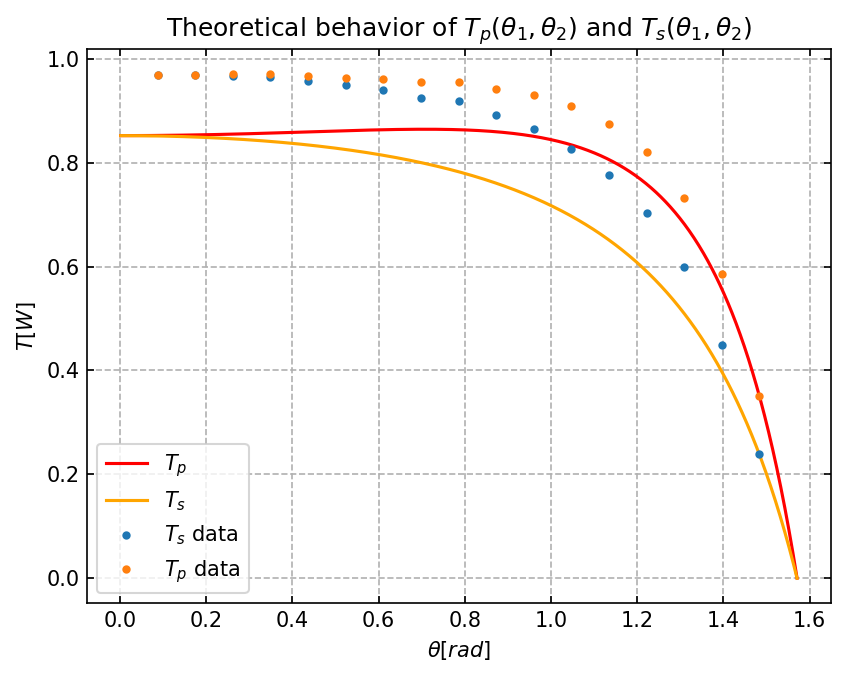

In [146]:
# Plotting transmission
plt.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), '-', color = 'red', label = r'$T_p$')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '-', color = 'orange', label = r'$T_s$')
plt.plot(theta1_s, transmitted_s(theta1_s, theta2_trans_s), '.', label = "$T_s$ data")
plt.plot(theta1_p, transmitted_p(theta1_p, theta2_trans_p), '.', label = "$T_p$ data")
# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $T_p(\theta_1, \theta_2)$ and $T_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$T [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

## FINAL PLOTS

C:\Users\hanse\AppData\Local\Temp\ipykernel_16984\3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
C:\Users\hanse\AppData\Local\Temp\ipykernel_16984\3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


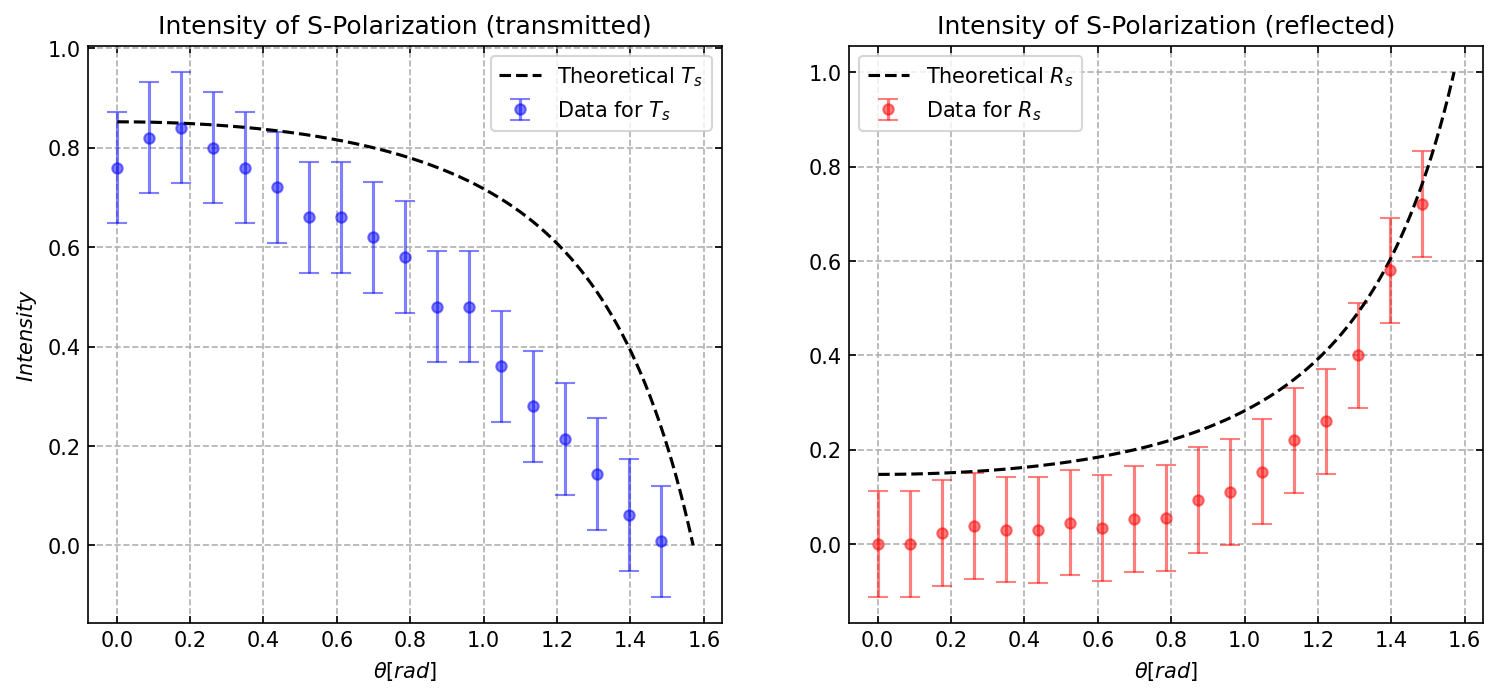

In [165]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# First axis object
ax1.errorbar(theta1_s, t_s, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'blue',label = r'Data for $T_s$')  # Plotting Transmitted Light

# Plot theoretical
ax1.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '--', color = 'black', label = r'Theoretical $T_s$')

# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
#ax.vlines(x = Brewster, ymin=0, ymax=0.1)
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax1.set_xlabel(r'$\theta [rad]$')
ax1.set_ylabel(r'$Intensity$')
ax1.set_title('Intensity of S-Polarization (transmitted)')
ax1.grid(ls = '--')
ax1.legend()
ax1.tick_params(direction = 'in', top = True, right = True)
# ax.text(1.01, 0.0, s = r"$\theta_{B}$", fontsize=8)

# second axis object
ax2.errorbar(theta1_s, r_s, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'red',label = r'Data for $R_s$')  # Plotting Reflected Light
ax2.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '--', color = 'black', label = r'Theoretical $R_s$')
ax2.set_xlabel(r'$\theta [rad]$')
ax2.set_title('Intensity of S-Polarization (reflected)')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.legend()
ax2.grid(ls = '--')

C:\Users\hanse\AppData\Local\Temp\ipykernel_16984\3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
C:\Users\hanse\AppData\Local\Temp\ipykernel_16984\3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2


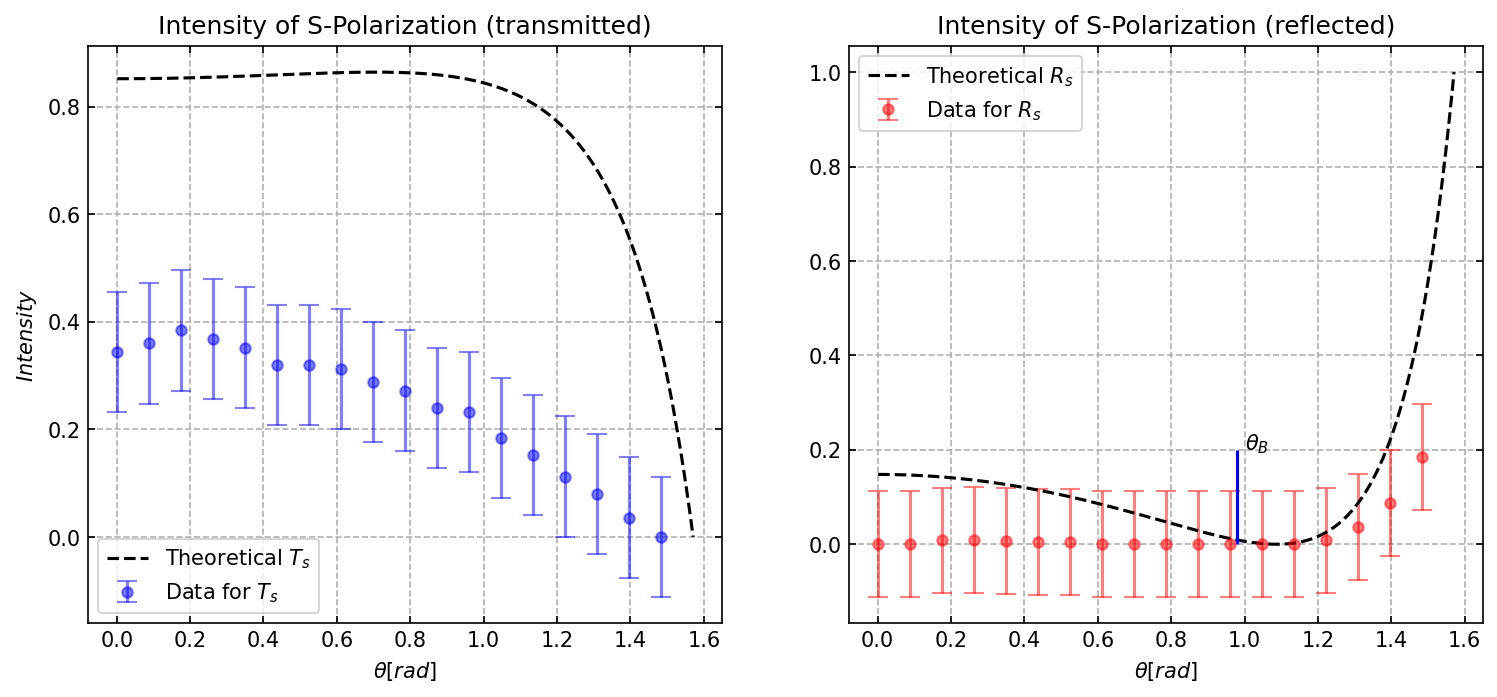

In [185]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# First axis object
ax1.errorbar(theta1_p, t_p, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'blue',label = r'Data for $T_s$')  # Plotting Transmitted Light

# Plot theoretical
ax1.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), linestyle = 'dashed', color = 'black', label = r'Theoretical $T_s$')

# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax1.set_xlabel(r'$\theta [rad]$')
ax1.set_ylabel(r'$Intensity$')
ax1.set_title('Intensity of S-Polarization (transmitted)')
ax1.grid(ls = '--')
ax1.legend()
ax1.tick_params(direction = 'in', top = True, right = True)
# ax.text(1.01, 0.0, s = r"$\theta_{B}$", fontsize=8)

# second axis object
ax2.errorbar(theta1_p, r_p, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'red',label = r'Data for $R_s$')  # Plotting Reflected Light
ax2.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), linestyle = 'dashed', color = 'black', label = r'Theoretical $R_s$')
ax2.vlines(x = Brewster, ymin=0, ymax=0.2, linestyle = '-', color = 'blue')
ax2.text(1.0, 0.2, r'$\theta_B$')
ax2.set_xlabel(r'$\theta [rad]$')
ax2.set_title('Intensity of S-Polarization (reflected)')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.legend()
ax2.grid(ls = '--')